<a href="https://colab.research.google.com/github/kgntmr/CONSTRUCTION-SECTOR-ANALYSIS/blob/main/Semantic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
import re
import nltk
import plotly.express as px
from nltk.corpus import stopwords
from gensim import corpora, models
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
amz = pd.read_excel('/content/Amazon.xlsx')

In [3]:
amz.astype({'Tweet content': 'string', 'Tweet language': 'string', 'Company Name': 'string'}).dtypes

Date              datetime64[ns]
Tweet content     string[python]
Tweet language    string[python]
Is a RT                     bool
Company Name      string[python]
dtype: object

In [4]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [5]:
def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)

    # Remove user mentions
    tweet = re.sub(r'@[^\s]+', '', tweet)

    # Remove special characters, punctuation, and numbers
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)

    # Remove retweet indicators
    tweet = re.sub(r'\brt\b', '', tweet)

    # Remove emojis
    tweet = remove_emojis(tweet)

    # Convert data to lowercase
    tweet = tweet.lower()

    # Removing stopwords
    clean_words = [word for word in tweet.split() if word.lower() not in stopwords.words('english')]

    return ' '.join(clean_words)

In [6]:
# Word tokenization
def word_tokenization(tweet):
    # Tokenization
    words = nltk.word_tokenize(tweet)
    return words

In [7]:
# Create a new DataFrame for the cleaned tweet content
amz_1 = pd.DataFrame()

# Create a new DataFrame by copying the columns you want from the original DataFrame
amz_1 = amz[['Date', 'Tweet language', 'Is a RT', 'Company Name']].copy()

In [8]:
# Apply preprocessing and tokenization
amz_1['Tweet content'] = amz['Tweet content']
amz_1['Tweet content'] = amz_1['Tweet content'].apply(preprocess_tweet)
amz_1['Tweet content'] = amz_1['Tweet content'].apply(word_tokenization)

In [9]:
# Conversion of data types
amz_1 = amz_1.astype({'Tweet content': 'string', 'Tweet language': 'string', 'Company Name': 'string'})

In [10]:
amz_1['Tweet content']

0        ['try', 'discovery', 'engine', 'amp', 'social'...
1        ['andreas', 'halvorsen', 'buys', 'facebook', '...
2        ['rt', 'stocks', 'surprise', 'investors', 'ear...
3        ['oneplus', 'launched', 'price', 'rs', 'availa...
4        ['ocado', 'shares', 'plummet', 'amazon', 'fres...
                               ...                        
38187    ['amazons', 'tick', 'reboot', 'aims', 'stand',...
38188    ['swear', 'momos', 'watching', 'trades', 'ever...
38189                            ['amzn', 'wants', 'roll']
38190    ['five', 'minute', 'trades', 'spy', 'dia', 'qq...
38191    ['rt', 'walls', 'cupboards', 'browsers', 'app'...
Name: Tweet content, Length: 38192, dtype: string

In [11]:
from collections import Counter

# Extracting the text from the 'Tweet content' column
tweet_texts = amz_1['Tweet content'].dropna().tolist()  # Drops any NaN values and convert to list

# Tokenizing the text and converting to lowercase
words = [word.lower() for text in tweet_texts for word in re.findall(r'\b\w+\b', text)]

# Counting the frequency of each word
word_counts = Counter(words)

# Getting the most common 50 words
top_50_words = word_counts.most_common(50)

# Displaying the results
for word, count in top_50_words:
    print(f'{word}: {count}')

amzn: 38713
amazon: 8527
rt: 7548
fb: 6965
aapl: 6908
nflx: 4410
read: 3853
goog: 3777
spy: 3586
googl: 3112
tsla: 3027
msft: 2703
qqq: 2627
stocks: 2463
twtr: 2120
new: 2008
stock: 1834
inc: 1756
buy: 1544
amp: 1489
earnings: 1445
spx: 1401
market: 1160
video: 1134
via: 1123
trading: 1122
sell: 1076
day: 1060
amazons: 1027
iwm: 1007
today: 989
prime: 968
baba: 960
see: 949
wmt: 948
apple: 931
like: 878
cloud: 854
tech: 852
bezos: 828
pt: 827
top: 823
retail: 817
may: 816
dia: 786
lnkd: 780
short: 746
trade: 739
ibm: 738
week: 737


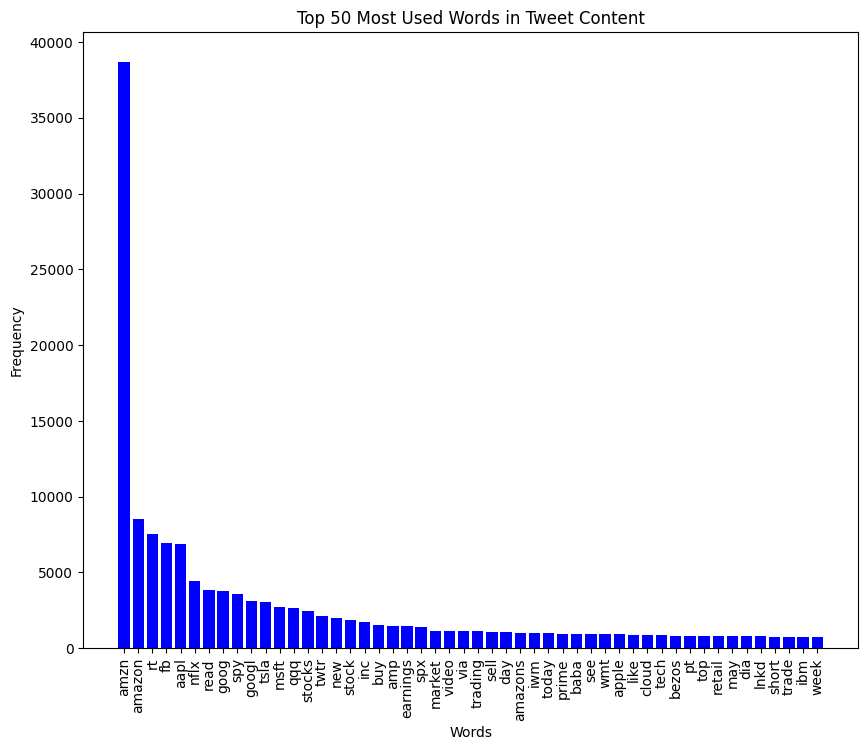

In [12]:
import matplotlib.pyplot as plt

# Continuing from the previous code block...
top_50_words = word_counts.most_common(50)

# Preparing data for plotting
words, frequencies = zip(*top_50_words)  # Unzipping the words and their counts

# Plotting
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
plt.bar(words, frequencies, color='blue')  # Create a bar chart
plt.xlabel('Words')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Top 50 Most Used Words in Tweet Content')  # Chart title
plt.show()

 For semantic analysis:
 -  'stocks', 'stock', 'earnings', 'market', 'trading', 'trade', 'short', maybe relevant for financial analysis,
 - Words that are too common or generic may not add much value to understanding specific topics. For instance, 'new', 'buy', 'sell', 'day', 'today', 'see', 'like', 'top', 'may', and 'week'.
 - Words like 'via' and 'amp' (which is often used in place of '&') are generally not useful in topic modeling.
 - Words like 'rt' (retweet), 'read', and 'video' might be more about the format or action related to the content rather than the content itself.
 - While 'amzn', 'fb', 'aapl', 'nflx', 'goog', 'googl', 'tsla', 'msft', 'qqq', 'twtr', 'spx', 'iwm', 'baba', 'wmt', 'apple', 'bezos', 'dia', 'lnkd', 'ibm' are relevant for financial or stock market-related discussions.
 - Words such as 'inc' (incorporated), which could be part of many company names, don't add much to the semantic content. 'Prime' might refer to Amazon Prime specifically but could be considered too specific for the topic model focuses on Amazon services.

In [13]:
def replace_specific_words(text):
    # Mapping for words
    replacements = {
        'amzn': 'amazon',
        'goog': 'google',
        'baba': 'ali baba',
        'tsla': 'tesla',
        'msft': 'microsoft',
        'fb': 'facebook',
        'aapl': 'apple',
        'googl': 'google',
        'twtr': 'twitter',
        'amazons': 'amazon',
        'googlee': 'google',
        'googleel': 'google',
        'nflx': 'netflix',
        'ali': 'ali baba',
        'lnkd': 'linkedin'
    }
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

# Update the 'Tweet content' column by applying the replacement function
amz_1['Tweet content'] = amz_1['Tweet content'].apply(replace_specific_words)

In [14]:
# Improved list of words to remove, ensuring lowercase for comparison
words_to_remove = ['new', 'buy', 'sell', 'day', 'today', 'see', 'like', 'top', 'may', 'week', 'inc', 'could', 'long', 'inc',
                   'via', 'amp', 'rt', 'read', 'video', 'pt', 'next', 'time', 'c', 'year', 'see', 'look', 'need']

# Enhanced function to remove specified words from a text
def remove_words(text, remove_list):
    # Creating a pattern that matches any of the words to remove
    pattern = r'\b(' + '|'.join(remove_list) + r')\b'
    # Replacing matched words with nothing (i.e., removing them), case-insensitive
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    # Removing extra spaces that may be left after word removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

In [15]:
# Applying the function to each tweet in the 'Tweet content' column
amz_1['Tweet content'] = amz_1['Tweet content'].apply(lambda text: remove_words(text, words_to_remove))

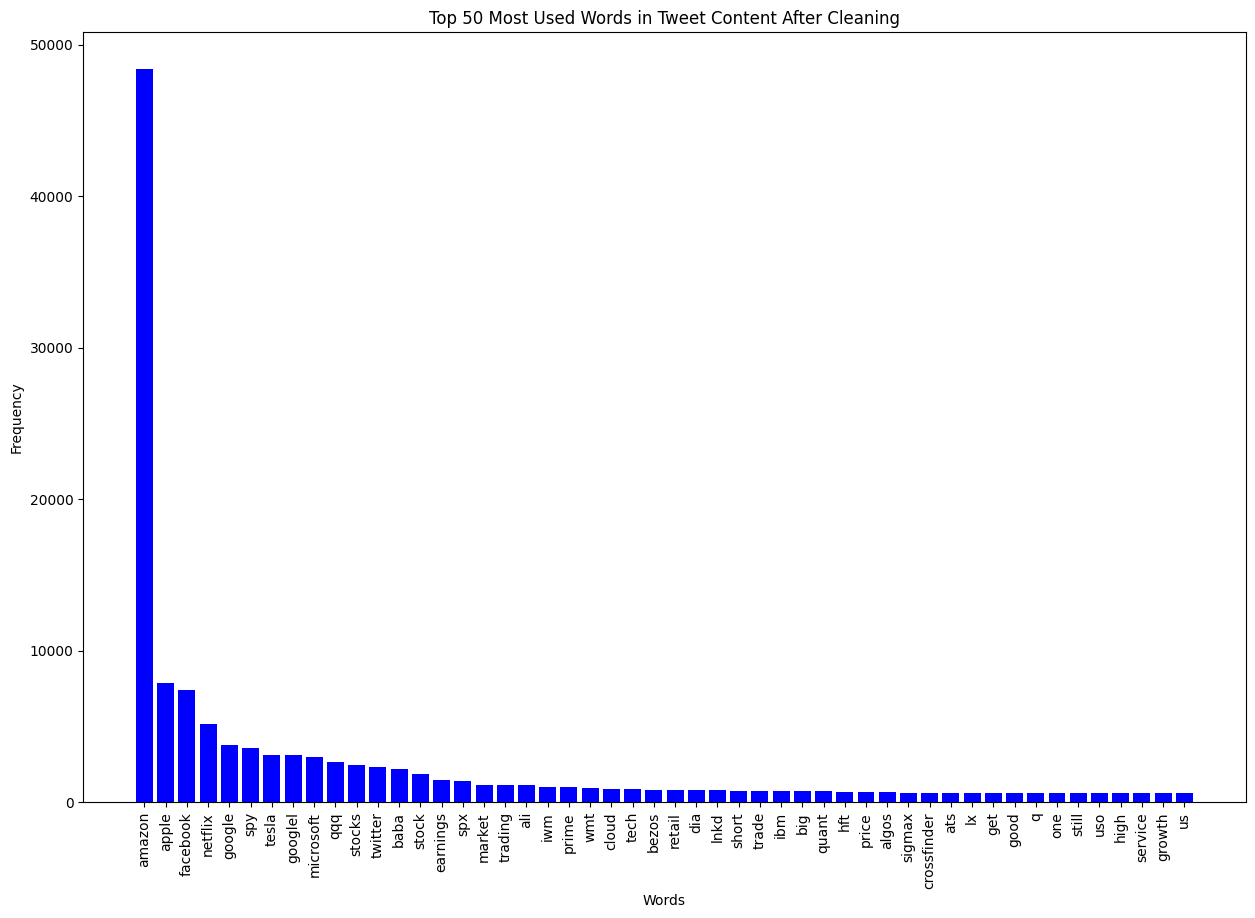

In [16]:
# Extracting text and tokenizing
all_words = [word.lower() for tweet in amz_1['Tweet content'].dropna() for word in re.findall(r'\b\w+\b', tweet)]
word_counts = Counter(all_words)

# Getting the most common 50 words
top_50_words = word_counts.most_common(50)

# Preparing data for plotting
words, frequencies = zip(*top_50_words)

# Plotting
plt.figure(figsize=(15, 10))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 50 Most Used Words in Tweet Content After Cleaning')
plt.show()

- Q is a former Nasdaq designation that noted a company had filed for bankruptcy.

In [17]:
# Convert the data type
amz_1.astype({'Tweet content': 'string', 'Tweet language': 'string', 'Company Name': 'string'}).dtypes

# Conversion
amz_1 = amz_1.astype({'Tweet content': 'string', 'Tweet language': 'string', 'Company Name': 'string'})

#print(amz_1.dtypes)


In [18]:
#amz_1.head()

These words seem to be related to technology, finance, and commerce, particularly focusing on companies like Amazon, Netflix, and Google, as well as terms related to trading such as "quant," "hft" (high-frequency trading), "price," "shares," "stock," and "market." There are also terms related to Amazon's services like "prime" and "aws" (Amazon Web Services).

In [19]:
# Preprocess the text again for LDA
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    tokens = text.lower().split()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Applying preprocessing to each tweet and creating a list of token lists
processed_tweets = [preprocess(tweet) for tweet in amz_1['Tweet content'].dropna()]

# Creating Dictionary and Corpus with the processed tokens
dictionary = corpora.Dictionary(processed_tweets)
corpus = [dictionary.doc2bow(tweet) for tweet in processed_tweets]

In [20]:
num_topics = 10  # Identify 10 topics
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100,
                            update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [21]:
# Print the top words associated with each topic
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.121*"baba" + 0.060*"ali" + 0.045*"yhoo" + 0.033*"chart" + 0.031*"intc" + 0.031*"back" + 0.026*"bidu" + 0.023*"vrx" + 0.021*"growth" + 0.020*"business"


Topic: 1 
Words: 0.125*"spy" + 0.102*"qqq" + 0.041*"spx" + 0.029*"iwm" + 0.028*"option" + 0.026*"big" + 0.024*"vix" + 0.019*"rating" + 0.019*"dia" + 0.016*"ibb"


Topic: 2 
Words: 0.039*"prime" + 0.027*"cloud" + 0.026*"v" + 0.025*"get" + 0.020*"sprint" + 0.020*"ge" + 0.017*"watch" + 0.015*"share" + 0.014*"wall" + 0.014*"agn"


Topic: 3 
Words: 0.044*"sbux" + 0.042*"csco" + 0.039*"deal" + 0.039*"dis" + 0.036*"dont" + 0.036*"pick" + 0.033*"f" + 0.032*"breakfast" + 0.024*"map" + 0.022*"bank"


Topic: 4 
Words: 0.046*"button" + 0.045*"dash" + 0.038*"kindle" + 0.036*"stake" + 0.024*"target" + 0.023*"analyst" + 0.023*"echo" + 0.020*"jpm" + 0.020*"coming" + 0.015*"citigroup"


Topic: 5 
Words: 0.149*"call" + 0.048*"put" + 0.038*"bearish" + 0.033*"buying" + 0.025*"previous" + 0.024*"potential" + 0.024*"maturity" + 0.022*"aro

Topic 0: Focuses on technology companies and potential business activities, mentioning "baba," "microsoft," and "yhoo."
Topic 1: Centers around Amazon's services, Jeff Bezos, and cloud computing.
Topic 2: Dominated by references to "amazon" and "amzn," indicating a strong thematic focus on Amazon.
Topic 3: Highlights financial markets, including stocks and trading symbols like "spy" and "qqq."
Topic 4: Pertains to major tech companies' stocks, like "fb," "aapl," and "goog."
Topic 5 through Topic 9: Cover various aspects of technology discussions, business strategy, market movement, and investment themes, touching on aspects like customer ratings, artificial intelligence, and market sentiment.

In [22]:
# For demonstration, let's check the topic distribution for the first processed tweet
document_num = 0
# Get the topic distribution for the first document
doc_distribution = lda_model.get_document_topics(corpus[document_num])
print(f"Document {document_num + 1} Topic Distribution:")
print(doc_distribution)

Document 1 Topic Distribution:
[(0, 0.025912385), (1, 0.042546976), (2, 0.18973415), (3, 0.01466166), (4, 0.031168303), (6, 0.34656927), (7, 0.24471575), (8, 0.031037362), (9, 0.066321276)]


# Application of LDA

In [23]:
# Print the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.121*"baba" + 0.060*"ali" + 0.045*"yhoo" + 0.033*"chart"')
(1, '0.125*"spy" + 0.102*"qqq" + 0.041*"spx" + 0.029*"iwm"')
(2, '0.039*"prime" + 0.027*"cloud" + 0.026*"v" + 0.025*"get"')
(3, '0.044*"sbux" + 0.042*"csco" + 0.039*"deal" + 0.039*"dis"')
(4, '0.046*"button" + 0.045*"dash" + 0.038*"kindle" + 0.036*"stake"')
(5, '0.149*"call" + 0.048*"put" + 0.038*"bearish" + 0.033*"buying"')
(6, '0.088*"apple" + 0.085*"facebook" + 0.059*"netflix" + 0.055*"google"')
(7, '0.509*"amazon" + 0.012*"market" + 0.008*"take" + 0.007*"say"')
(8, '0.039*"bezos" + 0.034*"u" + 0.029*"company" + 0.027*"talk"')
(9, '0.088*"service" + 0.049*"one" + 0.044*"report" + 0.032*"seekingalpha"')


# Evaluation
- Coherence Score: This metric measures the interpretability of the topics. Higher coherence scores indicate more interpretable topics.

In [24]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score:", coherence_lda)

/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Coherence Score: nan


- Perplexity: This metric measures how well the model predicts the held-out data. Lower perplexity values indicate better performance.

- Topic Diversity: Evaluate the diversity of topics generated by the model. This involves assessing how distinct each topic is from the others.

In [25]:
def calculate_topic_diversity(lda_model, topn=10):
    unique_words = set()
    total_words = topn * lda_model.num_topics  # Total number of words across all topics

    for topic_id in range(lda_model.num_topics):
        # Extract the top N words for each topic
        top_words = [word for word, prob in lda_model.show_topic(topic_id, topn)]
        unique_words.update(top_words)

    # Calculate diversity as the ratio of unique words to total words
    diversity = len(unique_words) / total_words
    return diversity

# Assuming lda_model is your trained LDA model from Gensim
topic_diversity = calculate_topic_diversity(lda_model, topn=10)
print("Topic Diversity:", topic_diversity)

Topic Diversity: 1.0


- Alpha and Beta Parameters: These control the document-topic density and topic-word density, respectively. Setting these to 'auto' allows the model to learn these parameters from the data, but it can also experiment with specific values.
- Chunksize: This parameter controls how many documents are processed at a time in each training iteration.

In [26]:
# Assuming 'lda_model' is your trained LDA model and 'corpus' is the corpus on which the model was trained
log_perplexity = lda_model.log_perplexity(corpus)
print("Log Perplexity:", log_perplexity)

# To convert log perplexity to perplexity
perplexity = 2**(-log_perplexity)
print("Perplexity:", perplexity)

Log Perplexity: -8.387291653962654
Perplexity: 334.83154763553017


In [27]:
# Print the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.121*"baba" + 0.060*"ali" + 0.045*"yhoo" + 0.033*"chart"')
(1, '0.125*"spy" + 0.102*"qqq" + 0.041*"spx" + 0.029*"iwm"')
(2, '0.039*"prime" + 0.027*"cloud" + 0.026*"v" + 0.025*"get"')
(3, '0.044*"sbux" + 0.042*"csco" + 0.039*"deal" + 0.039*"dis"')
(4, '0.046*"button" + 0.045*"dash" + 0.038*"kindle" + 0.036*"stake"')
(5, '0.149*"call" + 0.048*"put" + 0.038*"bearish" + 0.033*"buying"')
(6, '0.088*"apple" + 0.085*"facebook" + 0.059*"netflix" + 0.055*"google"')
(7, '0.509*"amazon" + 0.012*"market" + 0.008*"take" + 0.007*"say"')
(8, '0.039*"bezos" + 0.034*"u" + 0.029*"company" + 0.027*"talk"')
(9, '0.088*"service" + 0.049*"one" + 0.044*"report" + 0.032*"seekingalpha"')


In [ ]:
# Bar Plot for each topic showing word weights
fig = px.bar(topics, x='Word', y='Weight', color='Topic', title='LDA Topic Modeling: Word Weights by Topic',
             facet_col='Topic', facet_col_wrap=4, height=800)

fig.show()

Topic 2 has earning calls
Topic 3 has

In [ ]:
# Scatter Plot for visualizing word weights in topics
fig = px.scatter(df_topics, x='Word', y='Topic', size='Weight', color='Topic',
                 title='LDA Topic Modeling: Word Weights by Topic', height=800)

fig.update_traces(marker=dict(opacity=0.7), selector=dict(mode='markers'))

fig.show()